help an e-learning company that offers courses on programming find out the two best markets to advertise its product

thanks a lot to FCC for organizing the survey and making it open source - this will help data scientists gain insight into the data science community

this survey is intented for people who started coding no more than 5 years ago and consist of a series of multiple choice and short answer questions that will require no more than 5 minutes to complete

you can download the data from the survey here: 
https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv

import libraries:

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
# low_memory to silence the dtype warning
direct_link='https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
data=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

preview the data:

In [4]:
# to avoid truncated output 
pd.options.display.max_columns = 150 
print(data.shape)
print(data.head())
for each_column in data.columns:
    print(each_column)

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0               

some questions needing to be answered: 
-  Where are these new coders located.
-  What are the locations with the greatest number of new coders.
-  How much money new coders are willing to spend on learning.

In [84]:
# set dropna=True to only see people who have responded
print(data['JobRoleInterest'].value_counts(normalize=True)*100)
print(data['JobRoleInterest'].value_counts(dropna=False))

Full-Stack Web Developer                                                                                                                                                                           11.770595
  Front-End Web Developer                                                                                                                                                                           6.435927
  Data Scientist                                                                                                                                                                                    2.173913
Back-End Web Developer                                                                                                                                                                              2.030892
  Mobile Developer                                                                                                                                                                  

because responses can be more than one subject, split the column into muliple

In [6]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

print(splitted_interests.head())

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object


In [60]:
data['interest_count']=data['JobRoleInterest'].str.split(',').apply(lambda x: len(x) if np.all(pd.notnull(x)) else x)
print(data['interest_count'].value_counts(normalize=True, dropna=False)*100)

NaN      61.529574
 1.0     12.176066
 3.0      6.112792
 4.0      5.854195
 5.0      4.632737
 2.0      4.187070
 6.0      2.585970
 7.0      1.485557
 8.0      0.676754
 9.0      0.379642
 10.0     0.181568
 12.0     0.115543
 11.0     0.071527
 13.0     0.011004
Name: interest_count, dtype: float64


only 31% of the people that submitted their interest are interested in one subject while others expressed interest in multiple subjects
-  The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?

In [8]:
data['focus_group']=data['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')
print(pd.crosstab(data['focus_group'], data['interest_count']))

interest_count  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
focus_group                                                                  
False            681   114    86    55    20     5     1     0     0     0   
True            1532   647  1025  1009   822   465   269   123    69    33   

interest_count  11.0  12.0  13.0  
focus_group                       
False              0     0     0  
True              13    21     2  


In [47]:
print(data['focus_group'].value_counts(dropna=False))
print(data.pivot_table(index='interest_count', columns='focus_group', aggfunc='size'))

NaN      11183
True      6030
False      962
Name: focus_group, dtype: int64
focus_group     False   True 
interest_count               
1.0             681.0  1532.0
2.0             114.0   647.0
3.0              86.0  1025.0
4.0              55.0  1009.0
5.0              20.0   822.0
6.0               5.0   465.0
7.0               1.0   269.0
8.0               NaN   123.0
9.0               NaN    69.0
10.0              NaN    33.0
11.0              NaN    13.0
12.0              NaN    21.0
13.0              NaN     2.0


a lot of people have expressed interest in Web Developer or Mobile Developer

further, a good number of people have expressed either Web Developer or Mobile Developer as being their only interest

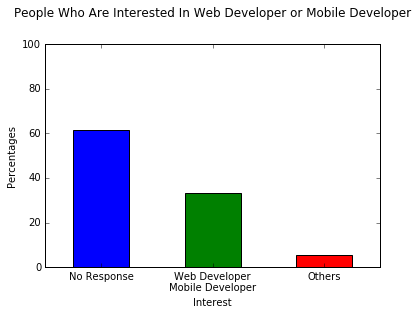

In [46]:
(data['focus_group'].value_counts(dropna=False, normalize=True)*100).plot.bar()
plt.title('People Who Are Interested In Web Developer or Mobile Developer', y=1.1)
plt.ylabel('Percentages')
plt.xlabel('Interest')
plt.xticks([0, 1, 2], ['No Response', 'Web Developer\nMobile Developer', 'Others'], rotation=0)
plt.ylim(0,100)
plt.show()

analyze the sample to identify where new coders are located

ensure we have the right sample selected by removing records where interest has been selected

In [61]:
# print(data['CountryLive'].value_counts(dropna=False))
print(data[data['JobRoleInterest'].notnull()]['CountryLive'].value_counts(dropna=True))

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Hungary                            34
Singapore                          34
New Zealand                        33
Argentina   

In [62]:
# print(data['CountryLive'].value_counts(dropna=False))
print(data[data['JobRoleInterest'].notnull()]['CountryLive'].value_counts(dropna=True, normalize=True))

United States of America         0.457005
India                            0.077216
United Kingdom                   0.046066
Canada                           0.038023
Poland                           0.019158
Brazil                           0.018865
Germany                          0.018280
Australia                        0.016379
Russia                           0.014917
Ukraine                          0.013016
Nigeria                          0.012284
Spain                            0.011261
France                           0.010968
Romania                          0.010383
Netherlands (Holland, Europe)    0.009506
Italy                            0.009067
Serbia                           0.007605
Philippines                      0.007605
Greece                           0.006727
Ireland                          0.006288
South Africa                     0.005703
Mexico                           0.005411
Turkey                           0.005265
Hungary                          0

~46% are from USA, followed by India (8%), UK (5%), and Canada (4%)

further analysis is required to investigate the amount of money people are willing to spend to ensure good investment

limited research to only include countries where majority of the respondents live

In [146]:
countries_of_interest=['United States of America', 'United Kingdom', 'India', 'Canada']

In [93]:
data['MonthsProgramming'].replace(0, 1, inplace=True)
data['spending_per_month']=data['MoneyForLearning']/data['MonthsProgramming']
# print(data[data['MonthsProgramming']==1][['MoneyForLearning', 'MonthsProgramming', 'spending_per_month']])
print(data['spending_per_month'].value_counts(dropna=False))

 0.000000       7736
NaN             1995
 16.666667       317
 8.333333        315
 50.000000       292
 25.000000       278
 100.000000      252
 33.333333       239
 4.166667        222
 10.000000       214
 20.000000       200
 83.333333       173
 12.500000       164
 5.000000        155
 41.666667       138
 166.666667      124
 3.333333        122
 1.666667        110
 6.666667        110
 20.833333       105
 200.000000      103
 5.555556        100
 500.000000       98
 2.500000         97
 1000.000000      92
 2.777778         91
 125.000000       88
 66.666667        88
 250.000000       88
 0.833333         87
                ... 
 2.173913          1
 2.592593          1
 123.333333        1
 1.222222          1
 2.325581          1
 2400.000000       1
 2520.000000       1
 52.500000         1
 85.000000         1
 97.222222         1
 5.357143          1
 7.166667          1
 392.857143        1
 4250.000000       1
 1.488095          1
 0.928571          1
 182.000000  

In [147]:
sample=data.copy()
sample=sample[sample['spending_per_month'].notnull()]
sample=sample[sample['CountryLive'].notnull()]
sample=sample[sample['JobRoleInterest'].notnull()]
grouped_mean=sample.groupby('CountryLive').spending_per_month.mean()
print(grouped_mean.loc[countries_of_interest])

CountryLive
United States of America    227.997996
United Kingdom               45.534443
India                       135.100982
Canada                      113.510961
Name: spending_per_month, dtype: float64


surprise that people from the United Kingdom spend little money on online learning compared to the others and equally surprised at how much people from India spends

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


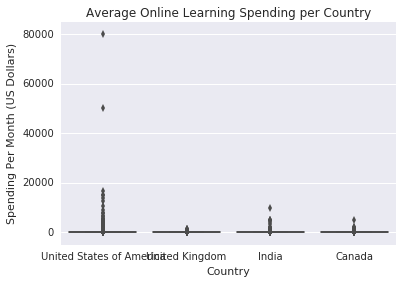

In [148]:
sns.boxplot(y='spending_per_month', x='CountryLive', data=sample[sample['CountryLive'].isin(countries_of_interest)])
plt.title('Average Online Learning Spending per Country')
plt.ylabel('Spending Per Month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), countries_of_interest)
plt.ylim(-5000, 85000)
plt.show()

remove outliers to get better visual

In [149]:
sample=sample[sample['spending_per_month']<20000]
grouped_mean=sample.groupby('CountryLive').spending_per_month.mean()
print(grouped_mean.loc[countries_of_interest])

CountryLive
United States of America    183.800110
United Kingdom               45.534443
India                       135.100982
Canada                      113.510961
Name: spending_per_month, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


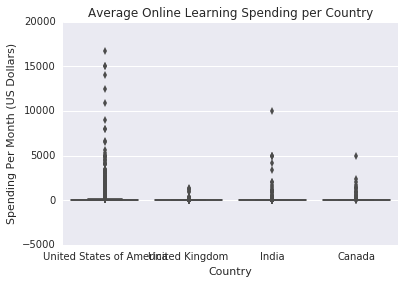

In [150]:
sns.boxplot(y='spending_per_month', x='CountryLive', data=sample[sample['CountryLive'].isin(countries_of_interest)])
plt.title('Average Online Learning Spending per Country')
plt.ylabel('Spending Per Month (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), countries_of_interest)
plt.ylim(-5000, 20000)
plt.show()

isolating India outliers for further investigation

In [151]:
india_outliers=sample[(sample['CountryLive'] == 'India') & (sample['spending_per_month'] >= 2500)]
print(india_outliers)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
13398  19.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
13398                NaN             NaN            more 

besides USA, Canada seems to be the next best candidate for advertising based on the average spending

India and UK have the appetite and budget potentially for the program as well

since there is a much larger number of people who are interested, it might be a better idea to advertise in India instead of Canada, if only one of them can be chosen

In [ ]:
at this point, the marketing team needs to be involved because 